In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv('adult.csv')

In [5]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [19]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [21]:
df.shape

(48842, 15)

In [11]:
df.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'fnlwgt'}>],
       [<Axes: title={'center': 'educational-num'}>,
        <Axes: title={'center': 'capital-gain'}>],
       [<Axes: title={'center': 'capital-loss'}>,
        <Axes: title={'center': 'hours-per-week'}>]], dtype=object)

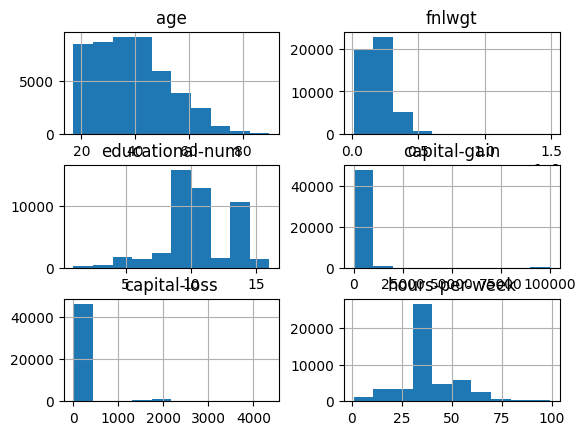

In [13]:
df.hist()

In [15]:
#df['target_name'].rename(columns=['income'],inplace=True)

In [18]:
df1=df.drop(columns=['income'])
target_name=df['income']

## Partie1:

In [22]:
data_numeric=df.select_dtypes(include='number')
data_numeric

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
0,25,226802,7,0,0,40
1,38,89814,9,0,0,50
2,28,336951,12,0,0,40
3,44,160323,10,7688,0,40
4,18,103497,10,0,0,30
...,...,...,...,...,...,...
48837,27,257302,12,0,0,38
48838,40,154374,9,0,0,40
48839,58,151910,9,0,0,40
48840,22,201490,9,0,0,20


In [23]:
from sklearn.model_selection import train_test_split
X = data_numeric
y = target_name
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train, X_test, y_train, y_test)

       age  fnlwgt  educational-num  capital-gain  capital-loss  \
37193   42  145175               10             0             0   
31093   52  175029                6             0             0   
33814   34  172664                9             0             0   
14500   28  125791                9             0             0   
23399   46   28419               11             0             0   
...    ...     ...              ...           ...           ...   
11284   36  635913                9             0             0   
44732   34  107624               10             0             0   
38158   28  250135               10             0             0   
860     46   96652               11             0             0   
15795   59  176118               14             0             0   

       hours-per-week  
37193              40  
31093              35  
33814              40  
14500              40  
23399              50  
...               ...  
11284              40  
447

In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled

array([[0.34246575, 0.09025278, 0.6       , 0.        , 0.        ,
        0.39795918],
       [0.47945205, 0.11052825, 0.33333333, 0.        , 0.        ,
        0.34693878],
       [0.23287671, 0.10892205, 0.53333333, 0.        , 0.        ,
        0.39795918],
       ...,
       [0.15068493, 0.16153679, 0.6       , 0.        , 0.        ,
        0.39795918],
       [0.39726027, 0.05729819, 0.66666667, 0.        , 0.        ,
        0.39795918],
       [0.57534247, 0.11126784, 0.86666667, 0.        , 0.        ,
        0.06122449]])

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
pipeline = make_pipeline(MinMaxScaler(), LogisticRegression())


In [37]:
# Afficher les étapes du pipeline
print("Étapes du pipseline:")
for step_name, step_process in pipeline.steps:
    print(f"{step_name} : {step_process}")

Étapes du pipeline:
minmaxscaler : MinMaxScaler()
logisticregression : LogisticRegression()


In [38]:
pipeline.named_steps

{'minmaxscaler': MinMaxScaler(), 'logisticregression': LogisticRegression()}

In [47]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [52]:
import time
start=time.time()
pipeline.fit(X_train, y_train)
elapsed_time=time.time()

In [48]:
predicted_data = pipeline.predict(X_test)

In [53]:
start

1706524866.6031058

In [54]:
elapsed_time

1706524866.8487837

In [40]:
from sklearn.metrics import accuracy_score

# Évaluer les performances du modèle sur le jeu de test
accuracy= accuracy_score(y_test, predicted_data)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8157436789845429


In [41]:
pipeline = LogisticRegression()
pipeline.fit(X_train, y_train)
predictions = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8037670181185382


avec StandardScaler:

In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
pipeline = make_pipeline(StandardScaler(), LogisticRegression())

In [43]:
pipeline.named_steps

{'standardscaler': StandardScaler(),
 'logisticregression': LogisticRegression()}

In [49]:
from sklearn.metrics import accuracy_score
accuracy= accuracy_score(y_test, predicted_data)
print(f"Accuracy: {accuracy}") #meme chose accuracy mais temps d'exécution non il y a une différence (car la normalisation influence ce temps mais accuracy dépend du modèle de ML)

Accuracy: 0.8186098884225612
